In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\anselmi bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_anselmi.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.790,0.854,0.703,0.703,1.230,1.124,1.792,0.984,0.790,0.703,...,1.792,1.124,1.230,0.780,1.792,0.790,0.703,0.780,1.230,1
1,0.615,0.703,0.854,0.703,0.790,1.792,0.790,0.854,0.790,1.230,...,0.790,0.703,0.703,1.323,1.124,1.230,0.703,0.854,0.703,1
2,0.780,0.703,0.703,1.230,0.790,1.323,0.780,1.230,0.780,0.703,...,0.790,1.323,0.703,0.615,0.854,0.615,0.703,0.854,0.790,1
3,0.703,0.703,1.323,1.124,1.792,1.124,1.792,0.790,0.703,0.703,...,0.703,0.615,1.323,0.780,0.703,0.615,0.703,0.854,0.790,1
4,1.230,1.323,0.780,0.703,0.615,0.703,0.854,0.615,0.703,0.854,...,0.790,0.703,0.854,0.615,0.703,0.780,1.792,1.124,1.792,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,0.780,1.323,0.615,0.854,1.230,0.790,0.854,0.703,0.703,0.615,...,0.780,1.792,0.984,1.124,0.984,0.984,1.230,0.703,0.780,1.323
1,0.984,1.230,0.780,1.230,0.703,0.780,0.984,1.230,0.703,1.323,...,0.790,1.792,0.984,1.124,1.792,0.790,0.854,0.615,1.323,1.124
2,0.790,0.984,1.230,0.703,0.780,1.230,1.323,0.790,0.703,1.323,...,0.703,0.703,1.323,0.790,0.780,1.792,0.780,0.703,0.790,1.230
3,1.323,0.790,1.230,0.703,0.854,0.703,0.703,0.790,1.323,0.703,...,1.124,1.792,0.780,0.790,1.792,0.780,0.703,0.703,0.615,0.703
4,0.703,0.703,0.780,1.230,1.323,1.124,1.792,0.780,1.230,0.780,...,0.780,1.230,0.780,0.790,1.230,0.854,0.790,1.230,0.854,0.615


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,0.780,1.323,0.615,0.854,1.230,0.790,0.854,0.703,0.703,0.615,...,0.780,1.792,0.984,1.124,0.984,0.984,1.230,0.703,0.780,1.323
1,0.984,1.230,0.780,1.230,0.703,0.780,0.984,1.230,0.703,1.323,...,0.790,1.792,0.984,1.124,1.792,0.790,0.854,0.615,1.323,1.124
2,0.790,0.984,1.230,0.703,0.780,1.230,1.323,0.790,0.703,1.323,...,0.703,0.703,1.323,0.790,0.780,1.792,0.780,0.703,0.790,1.230
3,1.323,0.790,1.230,0.703,0.854,0.703,0.703,0.790,1.323,0.703,...,1.124,1.792,0.780,0.790,1.792,0.780,0.703,0.703,0.615,0.703
4,0.703,0.703,0.780,1.230,1.323,1.124,1.792,0.780,1.230,0.780,...,0.780,1.230,0.780,0.790,1.230,0.854,0.790,1.230,0.854,0.615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,0.854,0.703,0.790,1.792,0.780,0.790,0.984,1.323,0.703,0.790,...,0.780,1.230,0.780,1.323,0.703,0.790,1.792,0.984,0.984,0.790
14665,1.230,0.703,0.780,1.323,1.230,0.790,1.323,0.984,0.790,0.780,...,0.854,0.703,0.615,1.323,0.780,1.230,0.984,0.780,0.615,1.323
14666,0.703,0.703,0.703,0.703,0.790,0.984,1.792,1.124,1.323,0.615,...,0.703,0.615,0.780,1.230,1.323,0.790,0.780,1.323,0.703,0.790
14667,1.124,1.230,0.703,0.854,0.790,0.984,1.230,0.703,0.780,1.230,...,0.615,0.854,0.703,0.703,0.703,0.703,0.615,1.323,0.790,1.323


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.780,1.323,0.615,0.854,1.230,0.790,0.854,0.703,0.703,0.615,...,1.792,0.984,1.124,0.984,0.984,1.230,0.703,0.780,1.323,0
1,0.984,1.230,0.780,1.230,0.703,0.780,0.984,1.230,0.703,1.323,...,1.792,0.984,1.124,1.792,0.790,0.854,0.615,1.323,1.124,0
2,0.790,0.984,1.230,0.703,0.780,1.230,1.323,0.790,0.703,1.323,...,0.703,1.323,0.790,0.780,1.792,0.780,0.703,0.790,1.230,0
3,1.323,0.790,1.230,0.703,0.854,0.703,0.703,0.790,1.323,0.703,...,1.792,0.780,0.790,1.792,0.780,0.703,0.703,0.615,0.703,0
4,0.703,0.703,0.780,1.230,1.323,1.124,1.792,0.780,1.230,0.780,...,1.230,0.780,0.790,1.230,0.854,0.790,1.230,0.854,0.615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,0.854,0.703,0.790,1.792,0.780,0.790,0.984,1.323,0.703,0.790,...,1.230,0.780,1.323,0.703,0.790,1.792,0.984,0.984,0.790,0
14665,1.230,0.703,0.780,1.323,1.230,0.790,1.323,0.984,0.790,0.780,...,0.703,0.615,1.323,0.780,1.230,0.984,0.780,0.615,1.323,0
14666,0.703,0.703,0.703,0.703,0.790,0.984,1.792,1.124,1.323,0.615,...,0.615,0.780,1.230,1.323,0.790,0.780,1.323,0.703,0.790,0
14667,1.124,1.230,0.703,0.854,0.790,0.984,1.230,0.703,0.780,1.230,...,0.854,0.703,0.703,0.703,0.703,0.615,1.323,0.790,1.323,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,1.001315
1,-79,1.004054
2,-78,1.009130
3,-77,1.005025
4,-76,1.006073
...,...,...
94,14,0.988201
95,15,0.992472
96,16,0.996236
97,17,0.993059


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,1.030252,150
1,-79,1.027237,151
2,-78,1.027749,152
3,-77,1.035601,153
4,-76,1.028470,154
...,...,...,...
94,14,1.037025,244
95,15,1.029616,245
96,16,1.035097,246
97,17,1.038854,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


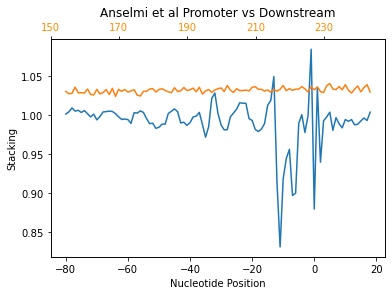

In [20]:
import matplotlib.ticker as ticker

# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Anselmi et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.790,0.854,0.703,0.703,1.230,1.124,1.792,0.984,0.790,0.703,...,1.792,1.124,1.230,0.780,1.792,0.790,0.703,0.780,1.230,1
1,0.615,0.703,0.854,0.703,0.790,1.792,0.790,0.854,0.790,1.230,...,0.790,0.703,0.703,1.323,1.124,1.230,0.703,0.854,0.703,1
2,0.780,0.703,0.703,1.230,0.790,1.323,0.780,1.230,0.780,0.703,...,0.790,1.323,0.703,0.615,0.854,0.615,0.703,0.854,0.790,1
3,0.703,0.703,1.323,1.124,1.792,1.124,1.792,0.790,0.703,0.703,...,0.703,0.615,1.323,0.780,0.703,0.615,0.703,0.854,0.790,1
4,1.230,1.323,0.780,0.703,0.615,0.703,0.854,0.615,0.703,0.854,...,0.790,0.703,0.854,0.615,0.703,0.780,1.792,1.124,1.792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,0.854,0.703,0.790,1.792,0.780,0.790,0.984,1.323,0.703,0.790,...,1.230,0.780,1.323,0.703,0.790,1.792,0.984,0.984,0.790,0
29334,1.230,0.703,0.780,1.323,1.230,0.790,1.323,0.984,0.790,0.780,...,0.703,0.615,1.323,0.780,1.230,0.984,0.780,0.615,1.323,0
29335,0.703,0.703,0.703,0.703,0.790,0.984,1.792,1.124,1.323,0.615,...,0.615,0.780,1.230,1.323,0.790,0.780,1.323,0.703,0.790,0
29336,1.124,1.230,0.703,0.854,0.790,0.984,1.230,0.703,0.780,1.230,...,0.854,0.703,0.703,0.703,0.703,0.615,1.323,0.790,1.323,0


# Prediction using machine learning

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef, confusion_matrix

In [31]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [32]:
feature_list=list(X_train.columns)

In [33]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [34]:
X.shape

(29338, 99)

## Model Training

In [35]:
kfold = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(max_depth=20,
                             max_features=None,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             n_estimators=300,
                             n_jobs=-1,
                             random_state=101)

fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=109)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))

    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))

    fold_no += 1

Fold 1: Accuracy: 0.8462849352419904, Precision: 0.8735976065818998, Recall: 0.8055172413793104, F1 Score: 0.8381772515249372, MCC: 0.6943209661894847, Specificity: 0.8861185983827493
Fold 2: Accuracy: 0.8401499659168371, Precision: 0.8767951625094482, Recall: 0.791268758526603, F1 Score: 0.8318393689494442, MCC: 0.6835341736377895, Specificity: 0.8889645776566758
Fold 3: Accuracy: 0.852760736196319, Precision: 0.8901345291479821, Recall: 0.806910569105691, F1 Score: 0.8464818763326225, MCC: 0.7088200249292705, Specificity: 0.8991769547325102
Fold 4: Accuracy: 0.8507157464212679, Precision: 0.8970023059185243, Recall: 0.7933378653976887, F1 Score: 0.8419913419913421, MCC: 0.7062789112586757, Specificity: 0.9084073820915927
Fold 5: Accuracy: 0.8425357873210634, Precision: 0.8768656716417911, Recall: 0.798233695652174, F1 Score: 0.8357041251778095, MCC: 0.6879534265001178, Specificity: 0.887140902872777
Fold 6: Accuracy: 0.8602590320381731, Precision: 0.8890612878200155, Recall: 0.811040

In [36]:
accuracy_list

[0.8462849352419904,
 0.8401499659168371,
 0.852760736196319,
 0.8507157464212679,
 0.8425357873210634,
 0.8602590320381731,
 0.854464894342195,
 0.8503749147920927,
 0.8527105352881009,
 0.8380497783839073]

In [37]:
precision_list

[0.8735976065818998,
 0.8767951625094482,
 0.8901345291479821,
 0.8970023059185243,
 0.8768656716417911,
 0.8890612878200155,
 0.9055059523809523,
 0.8926380368098159,
 0.8951426368542791,
 0.874536005939124]

In [38]:
recall_list

[0.8055172413793104,
 0.791268758526603,
 0.806910569105691,
 0.7933378653976887,
 0.798233695652174,
 0.8110403397027601,
 0.8022412656558998,
 0.7956254272043746,
 0.7968428277282087,
 0.793800539083558]

In [39]:
specificity_list

[0.8861185983827493,
 0.8889645776566758,
 0.8991769547325102,
 0.9084073820915927,
 0.887140902872777,
 0.905982905982906,
 0.9103740296400847,
 0.9048266485384092,
 0.907859078590786,
 0.883367839889579]

In [40]:
f1_score_list 

[0.8381772515249372,
 0.8318393689494442,
 0.8464818763326225,
 0.8419913419913421,
 0.8357041251778095,
 0.848260547742413,
 0.8507514854945823,
 0.8413444163353813,
 0.8431372549019608,
 0.8322147651006712]

In [41]:
mcc_list

[0.6943209661894847,
 0.6835341736377895,
 0.7088200249292705,
 0.7062789112586757,
 0.6879534265001178,
 0.7218708647707882,
 0.7147178992823967,
 0.7048136853222854,
 0.7094417835268221,
 0.6793794779358173]

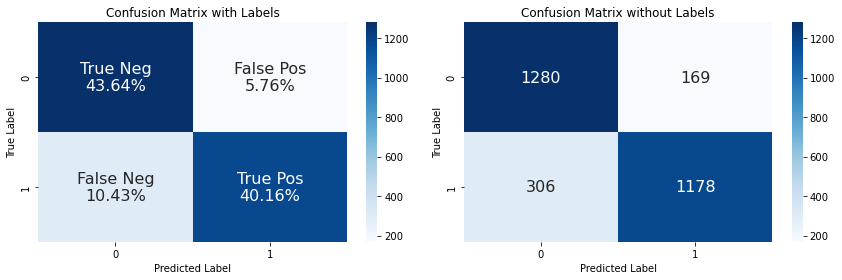

In [42]:
from sklearn.metrics import confusion_matrix
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [43]:
print(mean(accuracy_list))

0.8488306325941947


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


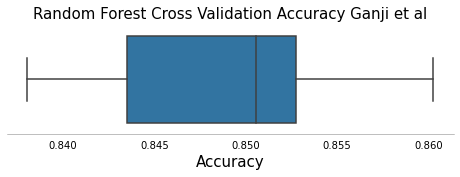

In [44]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [45]:
clf.feature_importances_

array([0.00367827, 0.00420061, 0.00395725, 0.00393786, 0.00422586,
       0.00411785, 0.00369216, 0.00343934, 0.00393429, 0.0037761 ,
       0.00357259, 0.00360478, 0.00403707, 0.00380421, 0.00401865,
       0.00372402, 0.00381285, 0.00421438, 0.00383067, 0.00392227,
       0.00393024, 0.00383667, 0.00363725, 0.00418701, 0.00369446,
       0.00432008, 0.0037804 , 0.00405184, 0.00431982, 0.00371237,
       0.004043  , 0.00395866, 0.00410434, 0.00408261, 0.00354937,
       0.00387063, 0.00444114, 0.00394733, 0.0037436 , 0.00406979,
       0.00422814, 0.00399511, 0.00374309, 0.003488  , 0.00398258,
       0.00450689, 0.00378793, 0.00519206, 0.00521655, 0.00466352,
       0.00465421, 0.00423048, 0.00426241, 0.00439636, 0.00523995,
       0.00436469, 0.00448029, 0.00492261, 0.00528727, 0.00509609,
       0.00540866, 0.00441537, 0.00534096, 0.00422717, 0.00422767,
       0.00486151, 0.00685677, 0.02291937, 0.14866953, 0.19773734,
       0.0538759 , 0.01683236, 0.02327993, 0.07141319, 0.01688

In [46]:
clf.feature_importances_.shape

(99,)

In [47]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

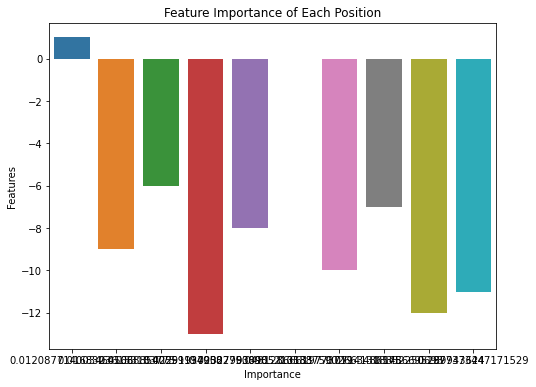

In [48]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [49]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.003678,-80
1,1,0.004201,-79
2,2,0.003957,-78
3,3,0.003938,-77
4,4,0.004226,-76
...,...,...,...
94,94,0.003849,14
95,95,0.004249,15
96,96,0.004147,16
97,97,0.003837,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

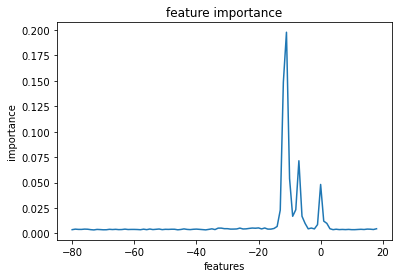

In [50]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [51]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8380497783839073
Precision: 0.874536005939124
Recall: 0.793800539083558
f1_score: 0.8322147651006712


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


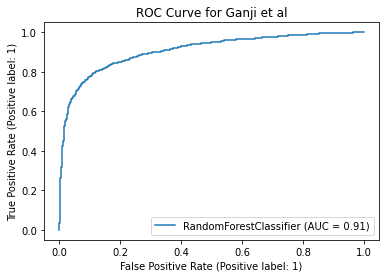

In [52]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


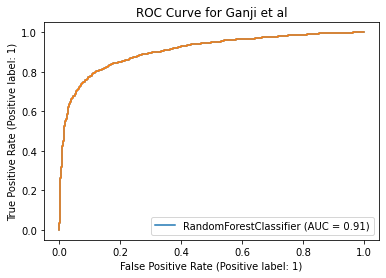

In [53]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_anselmi_rf_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [241]:
!pip install shap

In [242]:
import shap


In [243]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [244]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[3991, 4378, 3910, 8142, 4635, 4780, 6472, 2610, 6965, 6878, 4977, 3854, 7597, 5175, 4294, 1012, 505, 3980, 9778, 9504, 737, 1363, 3189, 1775, 5585, 1321, 4121, 232, 1924, 7402, 6263, 8092, 2495, 3543, 4993, 2939, 4785, 77, 5234, 6919]


In [245]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [246]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-2.17,-2.18,-1.76,-1.44,-2.81,-1.44,-1.46,-2.99,-1.46,-2.18,...,-2.99,-1.42,-2.99,-1.76,-1.42,-1.76,-2.18,-2.81,-1.42,-2.99
6345,-2.81,-1.44,-2.81,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-2.18,...,-1.44,-1.95,-1.46,-2.18,-1.46,-2.81,-1.44,-1.76,-2.18,-1.46
8807,-1.44,-1.76,-2.99,-1.42,-2.99,-1.46,-1.44,-1.76,-2.18,-1.46,...,-1.95,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-1.95,-1.95,-2.18
5017,-2.81,-1.44,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,-2.81,-1.52,...,-2.81,-1.76,-1.42,-2.18,-2.81,-1.76,-1.42,-2.81,-1.95,-2.18
2395,-1.44,-1.46,-2.18,-1.46,-2.81,-2.18,-1.44,-1.46,-1.76,-1.76,...,-2.17,-1.95,-1.52,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,-1.95
4771,-1.46,-2.81,-1.44,-2.18,-2.81,-1.46,-1.95,-1.44,-1.76,-2.99,...,-2.18,-1.76,-1.76,-1.44,-2.81,-1.42,-2.18,-2.17,-1.44,-2.99
6378,-2.18,-1.46,-1.76,-2.99,-1.44,-2.81,-1.44,-1.95,-2.17,-1.52,...,-1.76,-2.99,-1.44,-1.95,-2.81,-1.46,-1.52,-1.95,-2.17,-1.44
6038,-1.46,-1.52,-2.17,-2.18,-1.46,-1.52,-2.81,-1.46,-1.52,-2.17,...,-1.52,-2.17,-1.95,-2.18,-1.46,-2.18,-1.42,-2.18,-2.17,-1.52
2073,-1.42,-2.81,-1.52,-1.46,-2.99,-1.44,-1.46,-2.99,-1.44,-2.81,...,-2.17,-2.18,-1.44,-1.95,-2.17,-1.95,-1.95,-1.52,-2.17,-2.18
8765,-1.44,-1.95,-2.17,-1.52,-2.81,-1.76,-1.44,-2.17,-2.18,-1.76,...,-2.17,-1.44,-2.99,-1.76,-1.46,-1.95,-2.18,-1.46,-1.52,-2.17


In [247]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [248]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

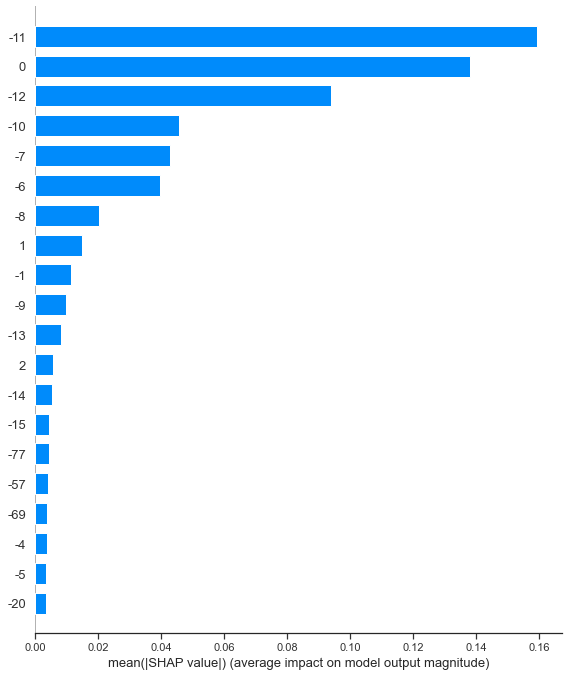

In [249]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

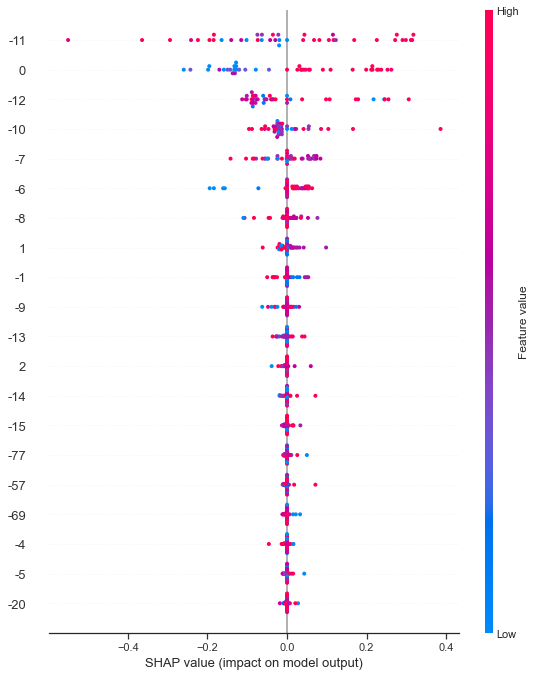

In [250]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

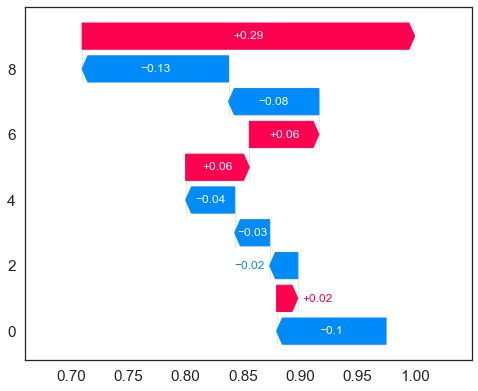

In [253]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [254]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [255]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [54]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\anselmi\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\anselmi\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\anselmi\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\anselmi\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [55]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



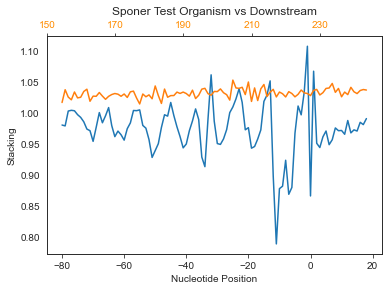

In [56]:
import matplotlib.ticker as ticker

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=test_line)
plot = sns.lineplot(x='index', y=0, data=downstream_test_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Sponer Test Organism vs Downstream')

# show the plot
plt.show()


## Test Labels

In [57]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [58]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [59]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8902597402597403


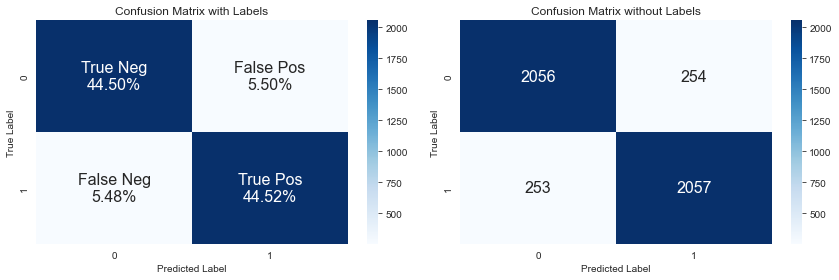

In [60]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [62]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.8939393939393939, Precision: 0.90625, Recall: 0.8787878787878788, F1 Score: 0.8923076923076922, MCC: 0.7882407813680822, Specificity: 0.9090909090909091
Fold 2/10
 Accuracy: 0.8809523809523809, Precision: 0.8666666666666667, Recall: 0.9004329004329005, F1 Score: 0.8832271762208067, MCC: 0.7624836925347199, Specificity: 0.8614718614718615
Fold 3/10
 Accuracy: 0.8571428571428571, Precision: 0.8481012658227848, Recall: 0.8701298701298701, F1 Score: 0.8589743589743589, MCC: 0.714526782707794, Specificity: 0.8441558441558441
Fold 4/10
 Accuracy: 0.8874458874458875, Precision: 0.9013452914798207, Recall: 0.8701298701298701, F1 Score: 0.8854625550660794, MCC: 0.7753568873226877, Specificity: 0.9047619047619048
Fold 5/10
 Accuracy: 0.9177489177489178, Precision: 0.9071729957805907, Recall: 0.9307359307359307, F1 Score: 0.9188034188034189, MCC: 0.8357798125006317, Specificity: 0.9047619047619048
Fold 6/10
 Accuracy: 0.9004329004329005, Precision: 0.9111111111111111, Recal

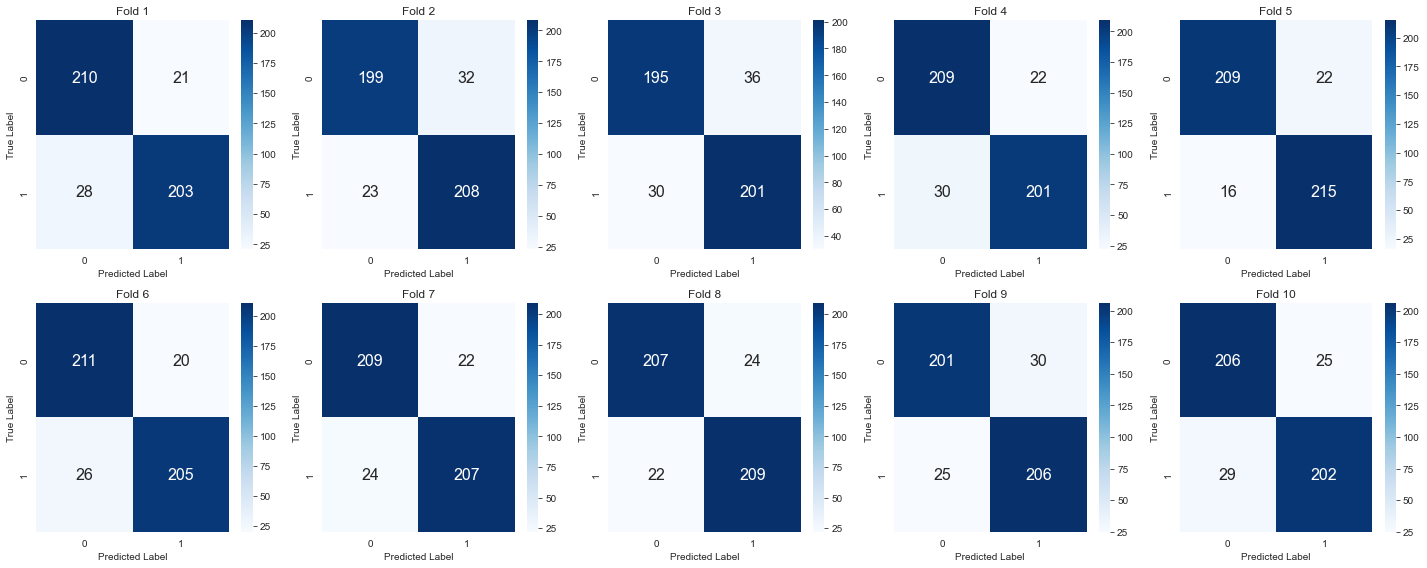

In [63]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [64]:
test_accuracy

[0.8939393939393939,
 0.8809523809523809,
 0.8571428571428571,
 0.8874458874458875,
 0.9177489177489178,
 0.9004329004329005,
 0.9004329004329005,
 0.9004329004329005,
 0.8809523809523809,
 0.8831168831168831]

In [65]:
test_precision

[0.90625,
 0.8666666666666667,
 0.8481012658227848,
 0.9013452914798207,
 0.9071729957805907,
 0.9111111111111111,
 0.9039301310043668,
 0.8969957081545065,
 0.8728813559322034,
 0.8898678414096917]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [66]:
test_recall

[0.8787878787878788,
 0.9004329004329005,
 0.8701298701298701,
 0.8701298701298701,
 0.9307359307359307,
 0.8874458874458875,
 0.8961038961038961,
 0.9047619047619048,
 0.8917748917748918,
 0.8744588744588745]

In [67]:
test_specificity

[0.9090909090909091,
 0.8614718614718615,
 0.8441558441558441,
 0.9047619047619048,
 0.9047619047619048,
 0.9134199134199135,
 0.9047619047619048,
 0.8961038961038961,
 0.8701298701298701,
 0.8917748917748918]

In [68]:
test_f1_score

[0.8923076923076922,
 0.8832271762208067,
 0.8589743589743589,
 0.8854625550660794,
 0.9188034188034189,
 0.899122807017544,
 0.8999999999999999,
 0.9008620689655172,
 0.8822269807280514,
 0.8820960698689956]

In [69]:
test_mcc

[0.7882407813680822,
 0.7624836925347199,
 0.714526782707794,
 0.7753568873226877,
 0.8357798125006317,
 0.8011360897026781,
 0.8008958194497489,
 0.8008958194497489,
 0.762083303485864,
 0.7663486675470865]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [70]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense anselmi promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.615,0.780,0.984,1.230,0.854,0.703,1.230,0.780,0.703,0.703,...,0.984,0.790,0.703,0.703,0.703,0.780,1.230,0.703,0.780,1
1,1.230,0.703,0.780,1.792,1.124,1.230,0.854,0.615,0.703,0.780,...,0.703,0.780,1.792,0.790,0.854,1.230,0.984,0.790,0.703,1
2,0.703,1.230,0.790,0.854,0.790,1.230,0.854,0.615,0.854,0.615,...,0.780,1.792,0.780,1.230,1.124,1.323,0.615,0.703,0.703,1
3,1.230,0.780,0.615,0.780,1.230,0.703,0.780,1.792,0.780,0.790,...,0.790,0.984,1.230,0.780,1.230,0.703,0.703,0.854,0.790,1
4,0.780,0.984,1.323,0.615,0.703,0.703,0.854,0.615,1.323,0.984,...,0.790,0.780,0.984,1.792,0.984,0.984,0.780,1.230,0.780,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,1.124,1.323,0.703,0.703,1.230,0.984,0.984,0.984,0.780,0.703,...,0.703,1.230,0.790,0.854,1.230,1.124,1.323,1.230,0.984,0
12164,0.703,1.230,0.780,0.703,1.230,1.124,0.984,1.323,0.790,1.792,...,1.323,0.984,1.124,0.984,1.230,0.780,1.792,1.124,1.230,0
12165,0.780,0.790,1.230,0.854,0.790,0.984,0.984,0.984,1.230,0.780,...,1.323,0.780,0.615,0.703,1.323,0.790,0.780,1.792,0.984,0
12166,0.703,0.780,1.230,0.854,0.703,0.790,1.792,1.124,0.984,0.984,...,0.984,0.984,1.230,1.323,0.780,0.703,0.703,0.615,0.780,0


In [71]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [72]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.8159408381265407, Precision: 0.8371278458844134, Recall: 0.7848932676518884, F1 Score: 0.8101694915254237, MCC: 0.6331359592751532, Specificity: 0.8917748917748918
Fold 2/10
 Accuracy: 0.7953985209531635, Precision: 0.7931596091205212, Recall: 0.7996715927750411, F1 Score: 0.7964022894521667, MCC: 0.5908139486343666, Specificity: 0.8470394736842105
Fold 3/10
 Accuracy: 0.8167625308134757, Precision: 0.8350694444444444, Recall: 0.7898193760262726, F1 Score: 0.8118143459915612, MCC: 0.6344747695555754, Specificity: 0.7911184210526315
Fold 4/10
 Accuracy: 0.8331963845521775, Precision: 0.8383333333333334, Recall: 0.825944170771757, F1 Score: 0.8320926385442515, MCC: 0.6664694982834685, Specificity: 0.84375
Fold 5/10
 Accuracy: 0.819227608874281, Precision: 0.825503355704698, Recall: 0.8092105263157895, F1 Score: 0.8172757475083058, MCC: 0.6385733027746446, Specificity: 0.8404605263157895
Fold 6/10
 Accuracy: 0.8307313064913723, Precision: 0.8295081967213115, Recall:

In [73]:
antisense_accuracy

[0.8159408381265407,
 0.7953985209531635,
 0.8167625308134757,
 0.8331963845521775,
 0.819227608874281,
 0.8307313064913723,
 0.8241577649958916,
 0.8208709942481512,
 0.8075657894736842,
 0.8297697368421053]

In [74]:
antisense_precision

[0.8371278458844134,
 0.7931596091205212,
 0.8350694444444444,
 0.8383333333333334,
 0.825503355704698,
 0.8295081967213115,
 0.8305369127516778,
 0.8125,
 0.8169491525423729,
 0.8404074702886248]

In [75]:
antisense_recall

[0.7848932676518884,
 0.7996715927750411,
 0.7898193760262726,
 0.825944170771757,
 0.8092105263157895,
 0.8322368421052632,
 0.8141447368421053,
 0.8338815789473685,
 0.7927631578947368,
 0.8141447368421053]

In [76]:
antisense_specificity

[0.8917748917748918,
 0.8470394736842105,
 0.7911184210526315,
 0.84375,
 0.8404605263157895,
 0.8292282430213465,
 0.8292282430213465,
 0.8341543513957307,
 0.8078817733990148,
 0.8223684210526315]

In [77]:
antisense_f1_score

[0.8101694915254237,
 0.7964022894521667,
 0.8118143459915612,
 0.8320926385442515,
 0.8172757475083058,
 0.8308702791461412,
 0.8222591362126247,
 0.8230519480519479,
 0.8046744574290483,
 0.8270676691729324]

In [78]:
antisense_mcc

[0.6331359592751532,
 0.5908139486343666,
 0.6344747695555754,
 0.6664694982834685,
 0.6385733027746446,
 0.6614668715640524,
 0.6484356994667639,
 0.6419714400767459,
 0.6154013289631478,
 0.6598617505046571]

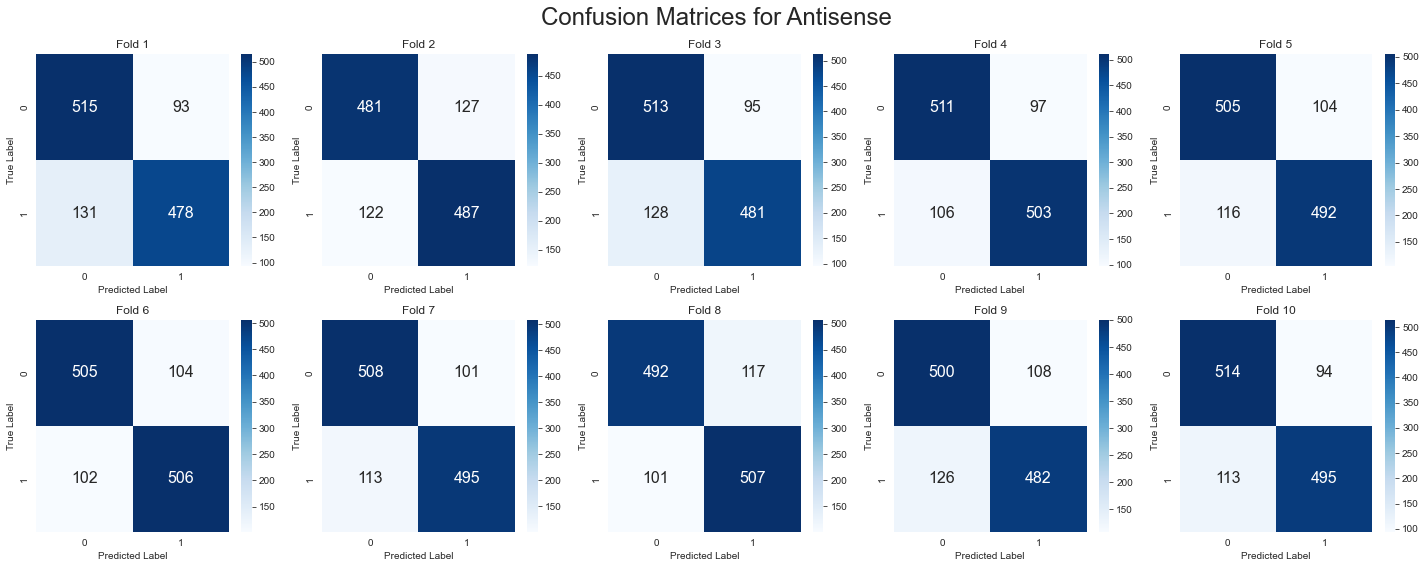

In [79]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [80]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced anselmi promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.780,1.230,1.124,1.323,0.615,1.323,1.124,0.984,0.984,1.230,...,0.703,0.780,1.230,0.703,0.703,0.703,0.854,1.230,0.790,1
1,0.854,1.230,0.790,0.703,0.703,0.854,0.703,0.703,0.615,1.323,...,0.790,0.780,1.792,0.780,0.703,0.615,0.854,0.790,1.792,1
2,0.984,0.984,1.792,0.984,0.790,0.854,0.790,1.792,0.790,0.780,...,0.780,1.792,0.790,0.703,0.854,0.703,0.790,1.792,0.780,1
3,1.323,0.790,0.703,1.323,0.780,0.790,1.230,0.854,0.703,0.615,...,0.703,0.703,1.323,1.124,1.230,0.703,0.703,0.854,1.230,1
4,0.780,1.230,0.780,0.703,0.703,0.615,0.703,0.703,0.854,1.230,...,1.323,0.790,0.703,0.780,1.230,0.703,0.703,0.703,0.854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,0.984,1.792,0.984,0.984,0.790,1.323,1.124,0.984,1.792,1.124,...,0.790,0.703,1.323,0.780,1.230,0.984,0.984,1.124,0.984,0
12126,0.984,1.124,1.230,1.323,1.124,1.792,0.790,0.703,0.780,1.792,...,0.984,1.792,1.124,1.230,0.703,1.323,0.984,1.124,1.792,0
12127,0.703,0.780,1.230,0.703,0.780,1.230,1.323,0.984,1.124,1.230,...,0.790,1.323,1.124,1.792,0.984,0.790,1.323,0.984,0.790,0
12128,1.792,0.984,1.124,1.230,0.703,0.780,1.230,1.323,0.984,0.790,...,1.792,1.124,0.984,1.230,0.854,1.230,1.124,0.984,1.792,0


In [81]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [82]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8153338829348722, Precision: 0.8377425044091711, Recall: 0.7825370675453048, F1 Score: 0.809199318568995, MCC: 0.6320635854944253, Specificity: 0.8453947368421053
Fold 2/10
 Accuracy: 0.8112118713932399, Precision: 0.842391304347826, Recall: 0.7660626029654036, F1 Score: 0.8024158757549611, MCC: 0.6250266301165938, Specificity: 0.8481848184818482
Fold 3/10
 Accuracy: 0.809563066776587, Precision: 0.8345195729537367, Recall: 0.7726523887973641, F1 Score: 0.8023952095808383, MCC: 0.6208602634360669, Specificity: 0.8564356435643564
Fold 4/10
 Accuracy: 0.809563066776587, Precision: 0.8443223443223443, Recall: 0.7594728171334432, F1 Score: 0.7996530789245446, MCC: 0.6223125116230878, Specificity: 0.8465346534653465
Fold 5/10
 Accuracy: 0.7897774113767518, Precision: 0.8120567375886525, Recall: 0.7545304777594728, F1 Score: 0.7822374039282665, MCC: 0.5810411147179964, Specificity: 0.8597359735973598
Fold 6/10
 Accuracy: 0.8219291014014839, Precision: 0.838541666666666

In [83]:
internal_accuracy

[0.8153338829348722,
 0.8112118713932399,
 0.809563066776587,
 0.809563066776587,
 0.7897774113767518,
 0.8219291014014839,
 0.8342951360263808,
 0.8054410552349547,
 0.8227535037098104,
 0.8367683429513603]

In [84]:
internal_precision

[0.8377425044091711,
 0.842391304347826,
 0.8345195729537367,
 0.8443223443223443,
 0.8120567375886525,
 0.8385416666666666,
 0.8521739130434782,
 0.8303571428571429,
 0.8587155963302753,
 0.8629893238434164]

In [85]:
internal_recall

[0.7825370675453048,
 0.7660626029654036,
 0.7726523887973641,
 0.7594728171334432,
 0.7545304777594728,
 0.7970297029702971,
 0.8085808580858086,
 0.7673267326732673,
 0.7722772277227723,
 0.8003300330033003]

In [86]:
internal_specificity

[0.8453947368421053,
 0.8481848184818482,
 0.8564356435643564,
 0.8465346534653465,
 0.8597359735973598,
 0.8250825082508251,
 0.8467874794069192,
 0.8599670510708401,
 0.8434925864909391,
 0.8731466227347611]

In [87]:
internal_f1_score

[0.809199318568995,
 0.8024158757549611,
 0.8023952095808383,
 0.7996530789245446,
 0.7822374039282665,
 0.817258883248731,
 0.8298052497883149,
 0.7975986277873071,
 0.8132059079061686,
 0.8304794520547946]

In [88]:
internal_mcc

[0.6320635854944253,
 0.6250266301165938,
 0.6208602634360669,
 0.6223125116230878,
 0.5810411147179964,
 0.6446325973154395,
 0.6694512099487523,
 0.6126223234203494,
 0.6487676484817531,
 0.6752965830350284]

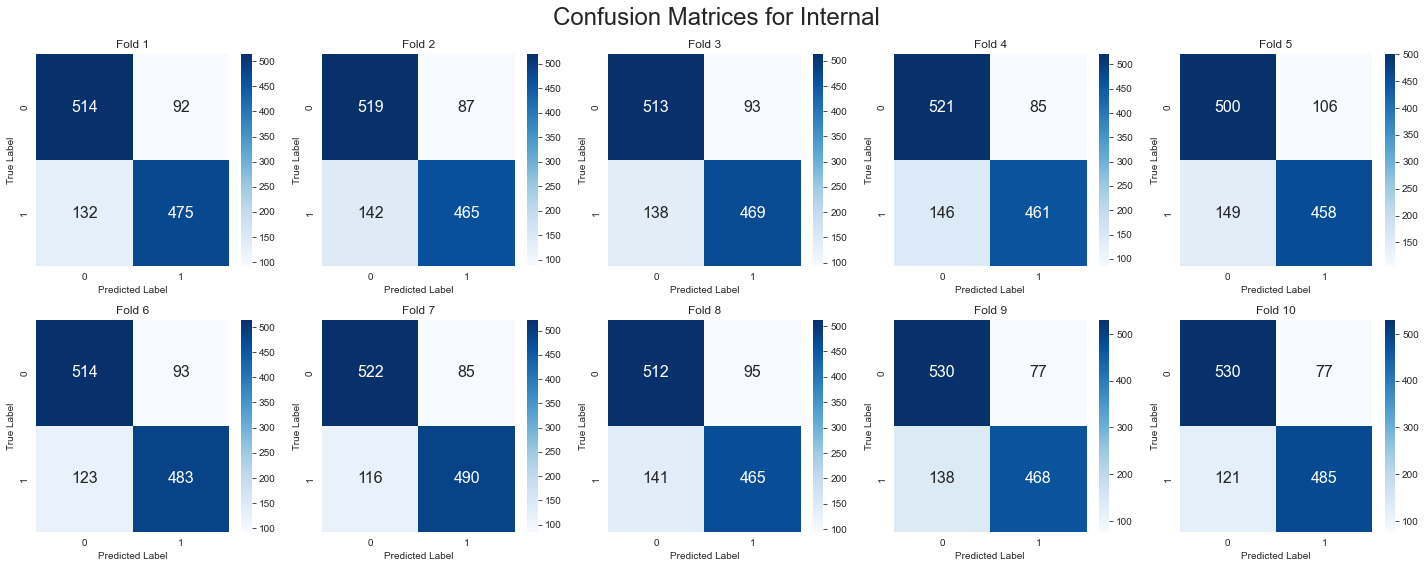

In [89]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
